**Question 4: Which 10 countries have the highest deaths per 100,000 population?**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [3]:
cases_df = pd.read_csv('../../dataset/WHO-COVID-19-global-table-data.csv',index_col=False)

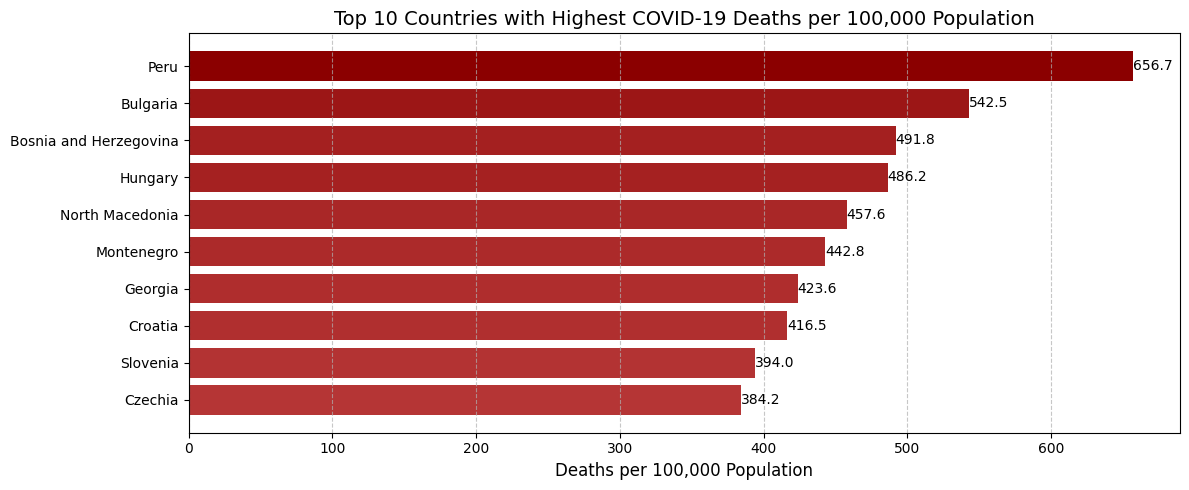

In [4]:
# Select the top 10 countries with the highest COVID-19 deaths per 100,000 population
top10 = (
    cases_df[cases_df['Name'] != 'Global']  # Exclude global summary
    .dropna(subset=['Deaths - cumulative total per 100000 population'])  # Remove missing values
    .sort_values('Deaths - cumulative total per 100000 population', ascending=False)  # Sort descending
    .head(10)  # Select top 10 countries
)

# Create a color gradient from light coral to dark red
cmap = LinearSegmentedColormap.from_list("red_gradient", ["lightcoral", "darkred"])
colors = cmap(top10['Deaths - cumulative total per 100000 population'] / top10['Deaths - cumulative total per 100000 population'].max())

# Initialize the figure with specified size
plt.figure(figsize=(12, 5))
# Draw a horizontal bar chart for the top 10 countries
bars = plt.barh(
    top10['Name'],  # Country names on the y-axis
    top10['Deaths - cumulative total per 100000 population'],  # Deaths per 100,000 on the x-axis
    color=colors  # Apply the gradient colors
)
# Add axis label and chart title
plt.xlabel('Deaths per 100,000 Population', fontsize=12)
plt.title('Top 10 Countries with Highest COVID-19 Deaths per 100,000 Population', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Displaying each bar with its value
for bar in bars:
    plt.text(
        bar.get_width(),  # Position text at the end of the bar
        bar.get_y() + bar.get_height()/2,  # Center text vertically
        f'{bar.get_width():.1f}',  # Display value as integer
        va='center', ha='left', fontsize=10
    )

plt.tight_layout()
plt.savefig('Top 10 Countries with Highest COVID-19 Deaths per 100,000 Population.png')
plt.show()
plt.close()


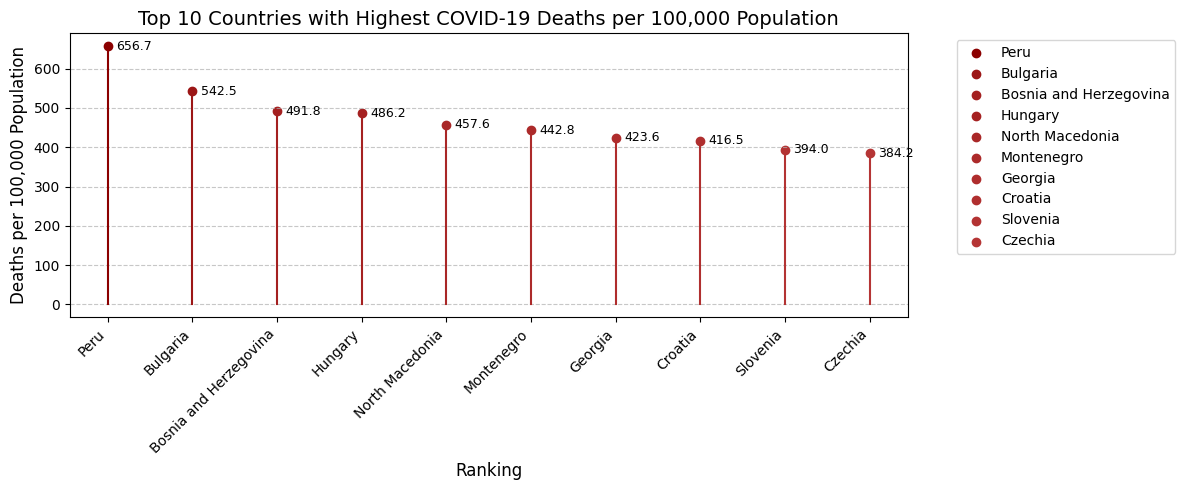

In [5]:
# Select the top 10 countries with the highest COVID-19 deaths per 100,000 population
top10 = (
    cases_df[cases_df['Name'] != 'Global']  # Exclude global summary
    .dropna(subset=['Deaths - cumulative total per 100000 population'])  # Remove missing values
    .sort_values('Deaths - cumulative total per 100000 population', ascending=False)  # Sort descending
    .head(10)  # Select top 10 countries
)

# Create a color gradient from light coral to dark red
cmap = LinearSegmentedColormap.from_list("red_gradient", ["lightcoral", "darkred"])
colors = cmap(top10['Deaths - cumulative total per 100000 population'] / top10['Deaths - cumulative total per 100000 population'].max())

# Initialize the figure with specified size
plt.figure(figsize=(12, 5))

# Draw a line plot for the top 10 countries
for i, (country, value) in enumerate(zip(top10['Name'], top10['Deaths - cumulative total per 100000 population'])):
    # Vertical line
    plt.plot([i, i], [0, value], color=colors[i])
    # Point with legend label
    plt.scatter(i, value, color=colors[i], label=country)
    # Text beside the point
    plt.text(i + 0.1, value, f"{value:.1f}", ha='left', va='center', fontsize=9, color='black')


# Add axis labels and chart title
plt.xlabel('Ranking', fontsize=12)
plt.ylabel('Deaths per 100,000 Population', fontsize=12)
plt.title('Top 10 Countries with Highest COVID-19 Deaths per 100,000 Population', fontsize=14)
plt.xticks(range(10), top10['Name'], rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('Top_10_Countries_with_Highest_COVID-19_Deaths_per_100000_Population_v2.png')
plt.show()
plt.close()